In [2]:
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.tag import pos_tag
from nltk.chunk import ne_chunk
import spacy
from collections import Counter



/Users/admin/HB_IDS/HackBeta/hb/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
nlp = spacy.load("en_core_web_lg")

In [4]:


# Specify the path to the normalized text file
normalized_text_path = '../artifacts/data_preparation/normalized_text.txt'  # Update this path

# Read the normalized text from the file
with open(normalized_text_path, 'r', encoding='utf-8') as file:
    normalized_text = file.read()

# Function to process text in smaller chunks
def process_text_in_chunks(text, chunk_size=1000000):
    entities = []
    for i in range(0, len(text), chunk_size):
        # Process each chunk of text
        doc = nlp(text[i:i+chunk_size])
        # Extract entities from the chunk
        entities.extend([(ent.text, ent.label_) for ent in doc.ents])
    return entities

# Assuming the max_length has been adjusted or you're processing in chunks
entities = process_text_in_chunks(normalized_text)

# Display identified entities and their labels
print("Identified entities and their labels:")
for text, label in set(entities):  # Convert to set to remove duplicates
    print(f"{text} ({label})")



Identified entities and their labels:
todaniel brindis end (PERSON)
mezzanotte home italian stock exchange (ORG)
zaca bandini zas (PERSON)
designers republic fivemonth (ORG)
tens millions (CARDINAL)
march world leather (EVENT)
kaeru iclt (PERSON)
changepreviously miti (ORG)
roughly billion usd (MONEY)
south americans (NORP)
china daily report (ORG)
us department agriculture foreign agricultural service (ORG)
productdevelopment productionprocesses (PERSON)
mosaic (PRODUCT)
month one point august (DATE)
lanxess board management (ORG)
lola cruz (ORG)
carlessi partnership (ORG)
secondhalf price (ORG)
cpsc (ORG)
antonio miguel espolador (PERSON)
china billion (LAW)
ottawa (GPE)
ifladp (ORG)
counterbalance monthonmonth (ORG)
india italy uae korea (ORG)
lowbase (GPE)
fatemulsifier (GPE)
mlfac kanpur settingup mlfac (LOC)
director richina inc (ORG)
hazaribagh day (DATE)
half dozen (CARDINAL)
msc (PERSON)
june friday (DATE)
france italy sole punctuation (ORG)
january november (DATE)
panama (GPE

In [5]:
unique_labels = list({label for _, label in entities})

# Display the list of unique labels
print(unique_labels)

['PRODUCT', 'CARDINAL', 'LANGUAGE', 'PERSON', 'FAC', 'MONEY', 'LAW', 'PERCENT', 'WORK_OF_ART', 'TIME', 'ORG', 'LOC', 'NORP', 'EVENT', 'QUANTITY', 'ORDINAL', 'DATE', 'GPE']


In [14]:


# Directly collect PRODUCT labeled entities
product_mentions = [entity[0] for entity in entities if entity[1] == 'PRODUCT']

# Collect ORG labeled entities with a simple heuristic
# This example assumes a simplistic heuristic: ORG entities with certain keywords might be products
# You would need to replace 'product_keywords' with actual domain-specific keywords
product_keywords = ['software', 'app', 'platform', 'device']  # Example heuristic keywords
org_mentions_potential_products = [entity[0] for entity in entities if entity[1] == 'ORG' and any(keyword in entity[0].lower() for keyword in product_keywords)]

# Combine and deduplicate product mentions
all_product_mentions = set(product_mentions + org_mentions_potential_products)

# Display identified product mentions
print("Identified product mentions:")
for product in all_product_mentions:
    print(product)


Identified product mentions:
interhides
audi
prizelaurell
programmetakes holistic approach
astronger
courteney
progresstowards
tyson
lectra cadcam software
crm connectors
codyeco
newquay
dystar chinas
android applestore ios
cole
zoon file european patent application
gucci
lineappelle exhibitors flock
kaeru brazilian
sil
crm
verde
honda
lowweight
epb
ngo
rosilk
cabestany
doan
apexbrasil
wetend department product development application section
meilihua
kevlar
kswiss vans timberland
holger
us house market appreciation
otb
alpina ua ninth
lvmh
koolaburra
allnew
nike
kaeru
pittards
cummins bosch br petrobras
fendi
segmentshas
bata
camry
american concrete institute association home appliance manufacturers national electrical manufacturers association
cleaningouterhavitlsc
hkcec
pph
echa
armani
appleon
evfta
kanpurunnao
mastrotto
saidwe
chrome tan
zenda
crocos
vrin
flipflops
aci application centre
cole haan johnston
american apparel footwear association
yesterdayeight
bmw
deri
higg
arleis
no

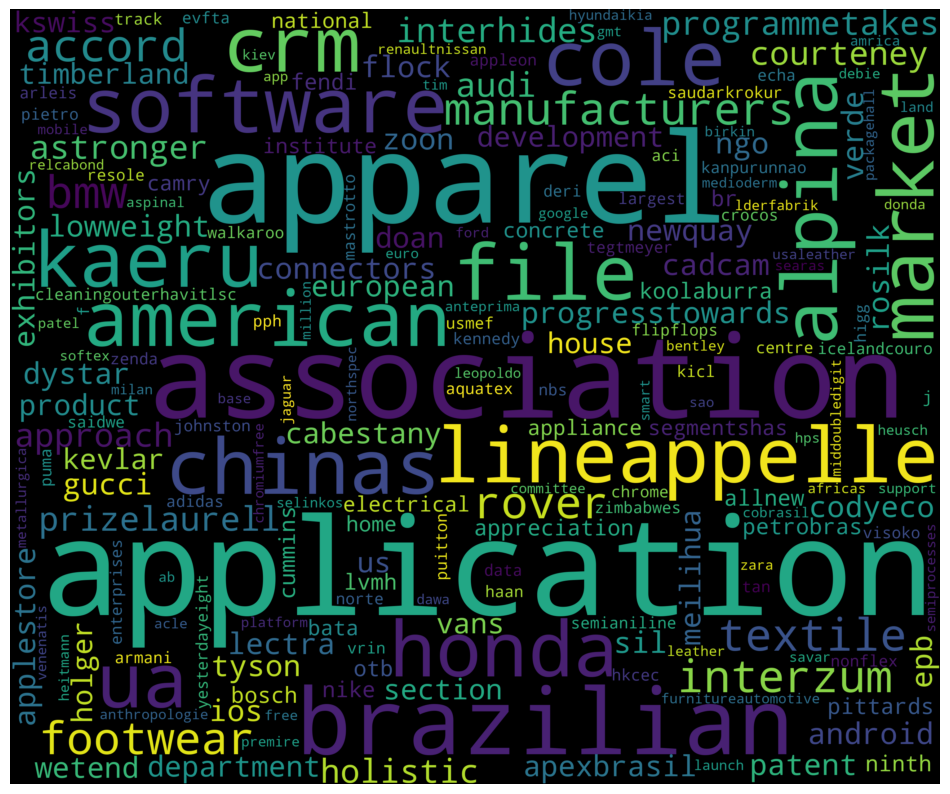

In [16]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Assuming 'all_product_mentions' is your set/list of product mentions
# Convert all product mentions into a single string
all_product_mentions_text = ' '.join(all_product_mentions)

# Generate a word cloud from the combined text
wordcloud = WordCloud(background_color='black', width=3000, height=2500).generate(all_product_mentions_text)

# Plot the word cloud using matplotlib
plt.figure(1, figsize=(12, 12))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Hide the axes
plt.show()


In [21]:

event_entities = [entity[0] for entity in entities if entity[1] == "EVENT"]
event_entities



['welle series',
 'welle series',
 'march brazils',
 'march world leather',
 'bangladesh three',
 'china months',
 'china months',
 'vietnam thousand pair',
 'vietnam thousand pair',
 'vietnam thousand pair',
 'vietnam thousand pair',
 'asia years ago',
 'asia years ago',
 'hugo',
 'hugo',
 'weekswhile week',
 'webinar series',
 'webinar series',
 'waterproofingthe day',
 'vietnam bangladesh',
 'vietnam bangladesh',
 'world war ii iconic',
 'world war ii iconic',
 'hugo',
 'hugo',
 'tokyo olympics',
 'tokyo olympics',
 'london week',
 'london week',
 'east year',
 'east year',
 'vietnam bangladesh',
 'vietnam bangladesh',
 'june bangladesh',
 'june bangladesh',
 'vietnam july',
 'vietnam july',
 'march european social partner cotance industrialleuropean trade union',
 'china september',
 'dday war award',
 'dday war award',
 'gulf regions',
 'gulf regions',
 'march lahore expo',
 'march lahore expo',
 'china september news',
 'march brazils jbs sa',
 'taiwan years ago',
 'taiwan years 

In [10]:
df=pd.read_csv('../artifacts/data_ingestion/Leather_Mag_Text_Cleaned.csv')
df

,Unnamed: 0,URL,Title,TitleAndDate,Texts
0,0,http://www.leathermag.com/news/newsstahl-expan...,Stahl expands ZDHC level 3certified portfolio,\nStahl expands ZDHC level 3-certified portfol...,\nStahl the world leader in speciality coating...
1,1,http://www.leathermag.com/news/newsbirkenstock...,Birkenstock Posts 1.492 Billion Revenues in Fi...,\nBirkenstock Posts €1.492 Billion Revenues in...,\nBirkenstock a prominent Germanybased global ...
2,2,http://www.leathermag.com/news/newsmacys-inc-r...,Macys Inc. Rejects Unsolicited Proposal from A...,"\nMacy’s, Inc. Rejects Unsolicited Proposal fr...",\nMacys has officially acknowledged the receip...
3,3,http://www.leathermag.com/news/newseu-cracks-d...,EU Cracks Down on Greenwashing and Misleading ...,\nEU Cracks Down on Greenwashing and Misleadin...,\nParliament has granted final approval to a d...
4,4,http://www.leathermag.com/news/newsburberry-ad...,Burberry Adjusts Financial Outlook Amidst Luxu...,\nBurberry Adjusts Financial Outlook Amidst Lu...,\nIn recent update Burberry remains confident ...
...,...,...,...,...,...
1715,1715,http://www.leathermag.com/news/newsthe-influen...,The influence of the fatliquor on the physicoc...,\nThe influence of the fatliquor on the physic...,\nSummary\n\nThe aim of the present survey is ...
1716,1716,http://www.leathermag.com/news/newswollsdorf-l...,Wollsdorf Leder expands,\nWollsdorf Leder expands\r\n 1 August ...,\n In order to meet increas...
1717,1717,http://www.leathermag.com/news/newsfootwear-tr...,Footwear trends autumnwinter 20067,\nFootwear trends autumn/winter 2006/7\r\n ...,\n Amsterdambased forecasti...
1718,1718,http://www.leathermag.com/news/newseuropean-de...,European delegation visits Brazil,\nEuropean delegation visits Brazil\r\n ...,\n From July 1724 the Presi...


In [26]:
import pandas as pd
import re

# Assuming df is your DataFrame and it includes a 'TitleAndDate' column

def extract_date(text):
    date_pattern = (
        r"\b\d{1,2}\s\w+|"  # Day Month
        r"\b\w+\s\d{1,2}-\d{2}|"  # Month Day-Day
        r"\b\d{4}/\d{2}|"  # Year/Year
        r"\b\d{1,2}[-/]\d{1,2}[-/]\d{2,4}\b|"  # Numeric dates
        r"\b\w+\s\d{4}\b|"  # Month Year
        r"\b\d{4}-\d{2}-\d{2}\b"  # ISO 8601 Date
    )
    match = re.search(date_pattern, text)
    return match.group(0) if match else None

events_and_dates = []
for _, row in df.iterrows():
    # Now using 'TitleAndDate' instead of 'Title'
    event_name_and_date = row['TitleAndDate']
    event_date = extract_date(event_name_and_date)
    
    # If a date is extracted, remove it from the string to isolate the event name
    event_name = re.sub(r'\b' + re.escape(event_date) + r'\b', '', event_name_and_date).strip() if event_date else event_name_and_date

    events_and_dates.append((event_name, event_date))

# Sort events and dates, placing None dates at the end
events_and_dates_sorted = sorted(events_and_dates, key=lambda x: (x[1] is None, x[1]))

for event in events_and_dates_sorted:
    print(event)


('The newest release of Lectra Fashion PLM 4. fashion companies the power of connectivity\r\n        14 September 2018', '0 gives')
('Lectra fashion PLM 4. No. 1 by industry experts\r\n        6 July 2018', '0 ranked')
('Two Die After Chennai Leather Factory Wall Collapse\r\n         2019', '1 April')
('South African Leather Industry Seeks Ghanaian Collaboration\r\n         2019', '1 April')
('Leather Naturally Reaches Campaign Funding Goal\r\n         2019', '1 April')
('Gucci Hires ‘Diversity Chief’\r\n         2019', '1 August')
('Kenyan Leather Industry Unexploited\r\n         2019', '1 August')
('China boosts LVMH profits\r\n         2018', '1 August')
('Sustainable leather making with enzymes\r\n         2013', '1 August')
('France: Growth in luxury sales\r\n         2013', '1 August')
('India: Leather industry under threat\r\n         2013', '1 August')
("One step tanning: Clariant's pioneering EasyWhite system\r\n         2013", '1 August')
('Colombia: Exports to US market on t

In [30]:
df_events = pd.DataFrame(events_and_dates_sorted, columns=['Event', 'Date'])


df_events['Date'] = pd.to_datetime(df_events['Date'], errors='coerce')


df_events.dropna(subset=['Date'], inplace=True)


# Sorting events in case they aren't sorted
df_events.sort_values(by='Date', inplace=True)

df_events['Event'] = df_events['Event'].str.replace('\r', '', regex=False)

/var/folders/9v/r40l6fkx7czgk511lj_7yghr0000gn/T/ipykernel_59619/1946059721.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_events['Date'] = pd.to_datetime(df_events['Date'], errors='coerce')


In [32]:
df_events

,Event,Date
1689,Cognis sales grow 6% in first nine months \n ...,2007-01-01
1620,APLF - Fashion Access show highlights\n ...,2011-03-01
1690,Packer rankings \n 9 January 2014,2013-01-01
1691,COTANCE call on Helsinki Fashion Week to recon...,2019-01-01
1622,Second Cairo show in \n 15 August 2005,2020-11-17
1617,Pan African Leather Fair postponed to \n ...,2021-06-01
1638,100th GDS shoe event \n 19 August 2005,2021-09-18
1692,"Brazil’s beef slaughter grew in Q1 , tanning d...",2022-01-01
1693,Geox Reports Financial Performance in the Firs...,2023-01-01
1613,Texworld Evolution Paris: the edition shows p...,2023-02-01


In [35]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd

# Ensure your 'Date' column is in datetime format if it's not already
df_events['Date'] = pd.to_datetime(df_events['Date'])

# Sort the events by date
df_events_sorted = df_events.sort_values(by='Date')

# Reverse the DataFrame to have the most recent events at the top if desired
df_events_sorted = df_events_sorted.iloc[::-1].reset_index(drop=True)

df_events_sorted 


,Event,Date
0,Texworld Evolution Paris: the edition shows p...,2023-02-01
1,Geox Reports Financial Performance in the Firs...,2023-01-01
2,"Brazil’s beef slaughter grew in Q1 , tanning d...",2022-01-01
3,100th GDS shoe event \n 19 August 2005,2021-09-18
4,Pan African Leather Fair postponed to \n ...,2021-06-01
5,Second Cairo show in \n 15 August 2005,2020-11-17
6,COTANCE call on Helsinki Fashion Week to recon...,2019-01-01
7,Packer rankings \n 9 January 2014,2013-01-01
8,APLF - Fashion Access show highlights\n ...,2011-03-01
9,Cognis sales grow 6% in first nine months \n ...,2007-01-01


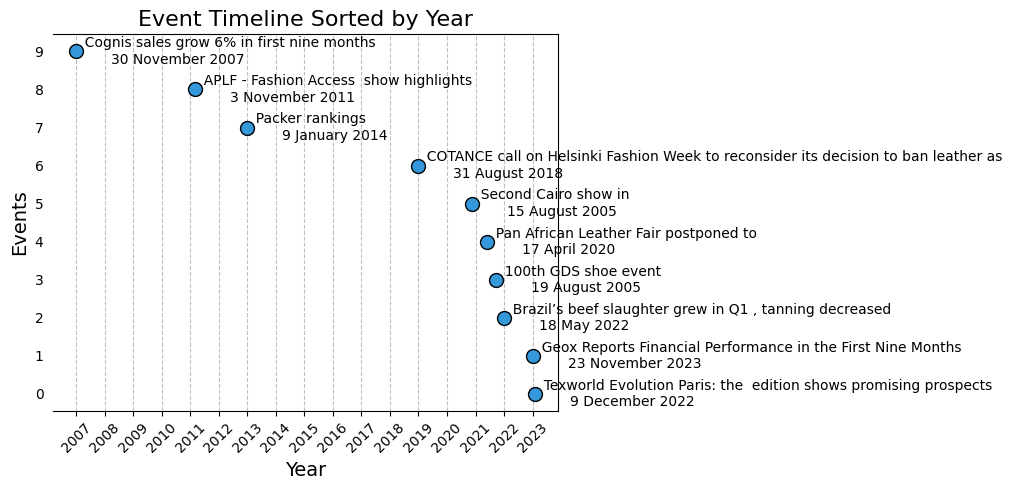

In [37]:
#Plotting
fig, ax = plt.subplots(figsize=(10, len(df_events_sorted) * 0.5))  # Adjust the height based on the number of events

# Colors and markers
color = "#3498db"  # A pleasant blue
marker = "o"  # Circle marker for events

# Plot each event
y_positions = range(len(df_events_sorted))
for y_pos, (index, row) in zip(y_positions, df_events_sorted.iterrows()):
    ax.scatter([row['Date']], [y_pos], color=color, s=100, edgecolor='k', marker=marker, zorder=3)
    ax.text(row['Date'], y_pos, '  ' + row['Event'], color="black", ha="left", va="center")

# Set the y-axis to use the event names
ax.set_yticks(y_positions)
# ax.set_yticklabels(df_events_sorted['Event'])

# Format the x-axis to group by year
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.xticks(rotation=45)

ax.set_xlabel('Year', fontsize=14)
ax.set_ylabel('Events', fontsize=14)
ax.set_title('Event Timeline ', fontsize=16)

# Hide y-axis' spines and ticks for a cleaner look
ax.yaxis.set_ticks_position('none') 
ax.spines['left'].set_visible(False)

# Add grid for better readability
plt.grid(True, which='major', linestyle='--', color='gray', alpha=0.5, zorder=1, axis='x')
plt.tight_layout()

# Show the plot
plt.show()

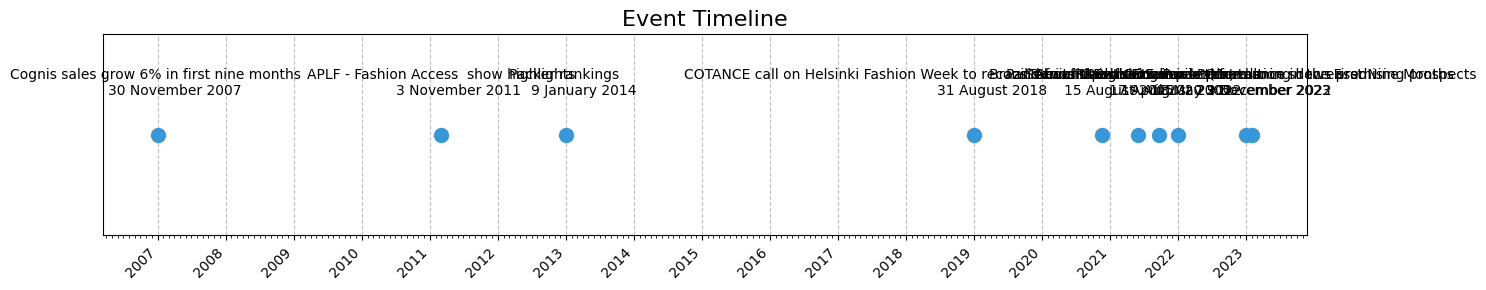

In [38]:

import numpy as np

# Ensure your 'Date' column is in datetime format if it's not already
df_events['Date'] = pd.to_datetime(df_events['Date'])

# Sort the events by date
df_events_sorted = df_events.sort_values(by='Date')

# Plotting
fig, ax = plt.subplots(figsize=(15, 3))  # Width is larger to accommodate the timeline

# Base level for all events to be plotted; all events will align horizontally
base_level = np.zeros(len(df_events_sorted))

# Colors and markers
color = "#3498db"  # A pleasant blue
marker = "o"  # Circle marker for events

# Plot each event at the base level, with a slight text offset for clarity
for (index, row), level in zip(df_events_sorted.iterrows(), base_level):
    ax.plot(row['Date'], level, color=color, marker=marker, ms=10)  # Mark the event date
    ax.text(row['Date'], level + 0.02, row['Event'], ha='center', va='bottom')  # Offset text above the marker

# Format the x-axis to show dates
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_minor_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.xticks(rotation=45, ha='right')

ax.set_title('Event Timeline', fontsize=16)

# Remove y-axis marks and labels since they're not needed
ax.yaxis.set_visible(False)

# Add grid for better readability, only for the x-axis
plt.grid(True, which='major', linestyle='--', color='gray', alpha=0.5, axis='x')

plt.tight_layout()
plt.show()


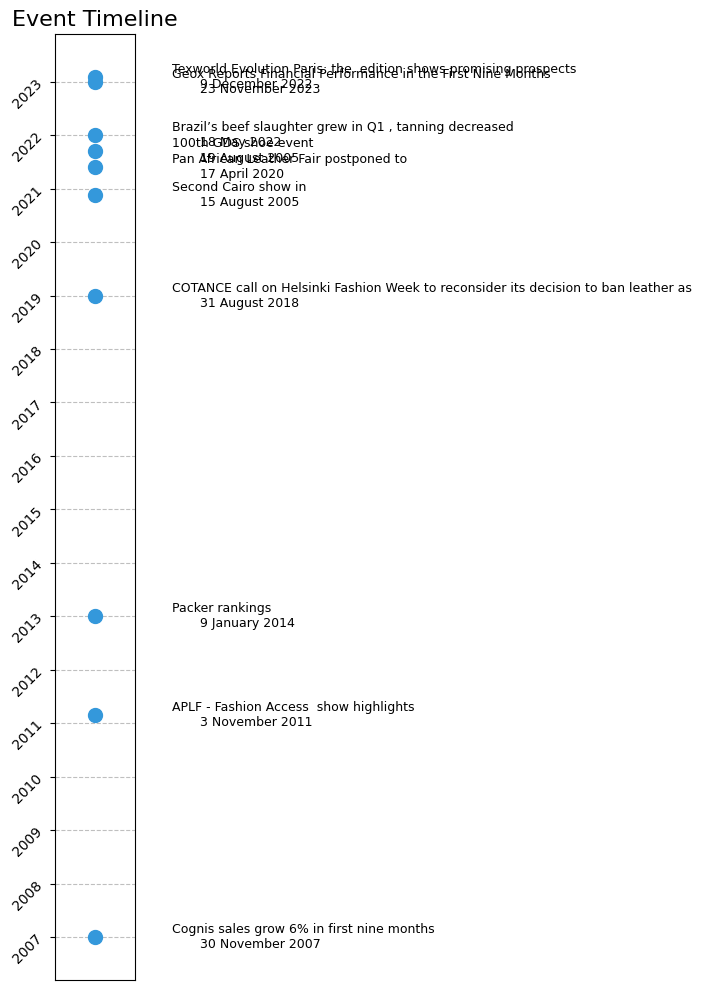

In [48]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd


df_events['Date'] = pd.to_datetime(df_events['Date'])


df_events_sorted = df_events.sort_values(by='Date', ascending=False)

# Plotting
fig, ax = plt.subplots(figsize=(10, len(df_events_sorted) * 1))  # Adjust figure height based on number of events, and width as needed


color = "#3498db"  
marker = "o"  

# Generate a vertical timeline for each event
for index, row in df_events_sorted.iterrows():
    # Plot the event marker
    ax.plot(0, row['Date'], color=color, marker=marker, ms=10)  # ms is marker size
    # Plot the event label slightly offset to the right for clarity, ensuring it's in one line
    ax.text(0.1, row['Date'], ' ' + row['Event'], verticalalignment='center', horizontalalignment='left', fontsize=9)

# Set y-axis to date format
ax.yaxis_date()

# Format the y-axis to show years, adjusting as needed for your dataset
ax.yaxis.set_major_locator(mdates.YearLocator())
ax.yaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.yticks(rotation=45)

# Title and axis labels
ax.set_title('Event Timeline', fontsize=16)

# Hide the x-axis as it's not used
ax.xaxis.set_visible(False)

# Invert y-axis to have recent dates at the top
# ax.invert_yaxis()

# Add a horizontal grid for better readability, corresponding to the major y-ticks
ax.yaxis.grid(True, linestyle='--', color='gray', alpha=0.5)

plt.tight_layout()
plt.show()
